In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from lxml import html

In [53]:
r = requests.get('https://soundcloud.com/jenniperwong/followers')
#soup = BeautifulSoup(r.content, "html.parser")
#source_code = requests.get(url)
soup = BeautifulSoup(r.text, 'html5lib')
#soup = soup.find('userNetwork')
#soup = soup.find('article')
#find('userNetwork')


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="//style.sndcdn.com" rel="dns-prefetch"/>
  <link href="//a-v2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//api-v2.soundcloud.com" rel="dns-prefetch"/>
  <link href="//sb.scorecardresearch.com" rel="dns-prefetch"/>
  <link href="//secure.quantserve.com" rel="dns-prefetch"/>
  <link href="//eventlogger.soundcloud.com" rel="dns-prefetch"/>
  <link href="//api.soundcloud.com" rel="dns-prefetch"/>
  <link href="//ssl.google-analytics.com" rel="dns-prefetch"/>
  <link href="//i1.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i3.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i4.sndcdn.com" rel="dns-prefetch"/>
  <link href="//wis.sndcdn.com" rel="dns-prefetch"/>
  <link href="//va.sndcdn.com" rel="dns-prefetch"/>
  <link href="//pixel.quantserve.com" rel="dns-prefetch"/>
  <title>
   jenn.
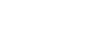
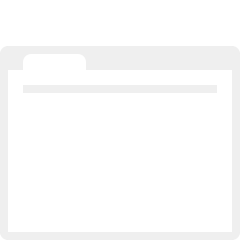

In [54]:
print(soup.prettify())

In [58]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.get("https://soundcloud.com/jenniperwong/followers")

In [60]:
driver = webdriver.Chrome(chromedriver)
driver.get('https://soundcloud.com/jenniperwong/followers')
p_element = driver.find_element_by_id(id_='userNetwork')
print(p_element.text)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"userNetwork"}
  (Session info: chrome=68.0.3440.106)
  (Driver info: chromedriver=2.40.565386 (45a059dc425e08165f9a10324bd1380cc13ca363),platform=Mac OS X 10.13.3 x86_64)
